In [42]:
library( tidyverse )
library( broom )

In [2]:
str( diamonds )

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


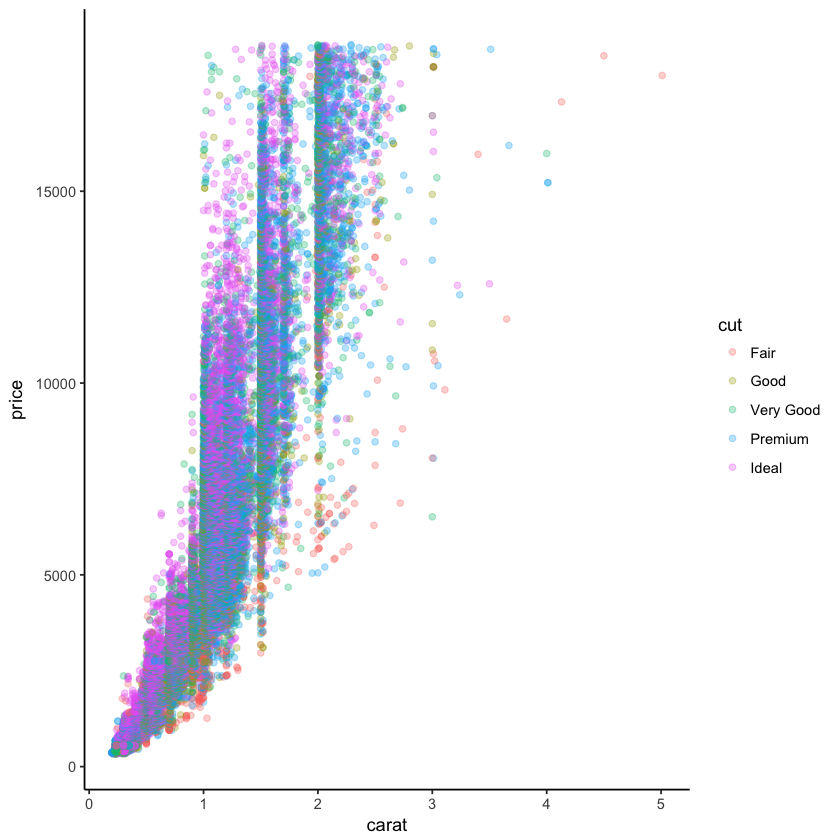

In [5]:
ggplot( diamonds ) +
    geom_point( aes( x = carat, y = price, color = cut ), alpha = 0.3 ) +
    theme_classic()

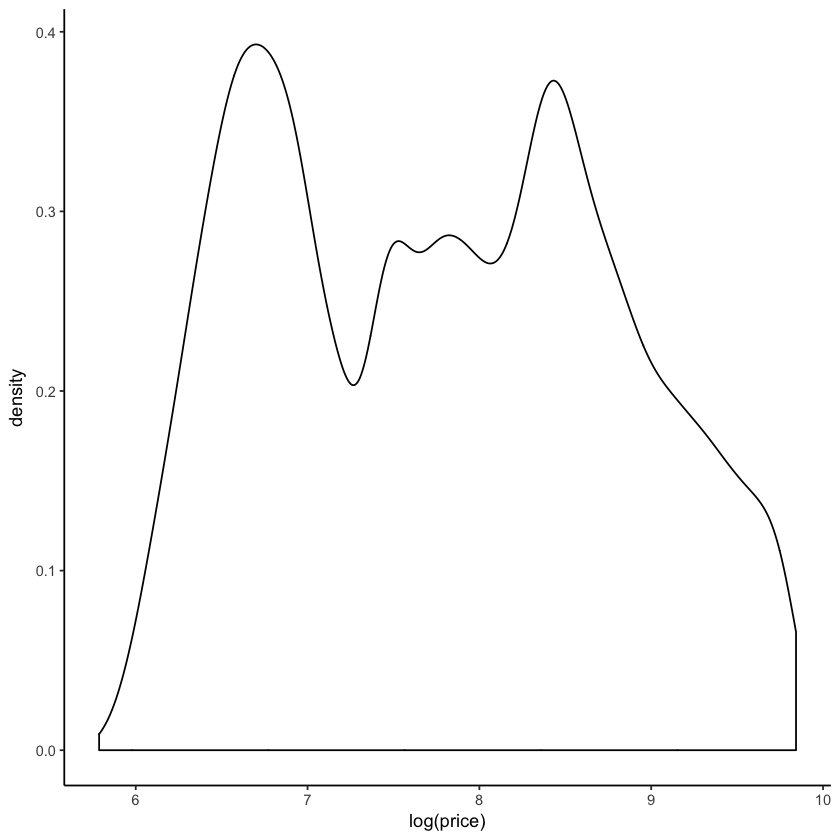

In [23]:
ggplot( diamonds, aes( x = log( price ) ) ) +
    geom_density() +
    theme_classic()

In [37]:
fit.lm <- lm( price
            ~ poly( carat, 3 )
            + cut
            + clarity 
            , data = diamonds )

In [38]:
summary( fit.lm )


Call:
lm(formula = price ~ poly(carat, 3) + cut + clarity, data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-10655.8   -526.3    -98.4    395.4  24593.2 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3598.311      9.714 370.421  < 2e-16 ***
poly(carat, 3)1 927923.336   1328.497 698.476  < 2e-16 ***
poly(carat, 3)2  23412.064   1241.296  18.861  < 2e-16 ***
poly(carat, 3)3 -86273.533   1236.602 -69.767  < 2e-16 ***
cut.L              621.005     21.543  28.827  < 2e-16 ***
cut.Q             -287.987     18.949 -15.198  < 2e-16 ***
cut.C              184.882     16.445  11.243  < 2e-16 ***
cut^4               15.217     13.175   1.155 0.248129    
clarity.L         3726.775     32.646 114.156  < 2e-16 ***
clarity.Q        -1755.305     30.587 -57.387  < 2e-16 ***
clarity.C          853.289     26.181  32.591  < 2e-16 ***
clarity^4         -357.319     20.889 -17.106  < 2e-16 ***
clarity^5          235.877     17.038

In [43]:
tidy( fit.lm )

term,estimate,std.error,statistic,p.value
(Intercept),3598.31144,9.714112,370.421025,0.000000e+00
"poly(carat, 3)1",927923.33583,1328.496568,698.476276,0.000000e+00
"poly(carat, 3)2",23412.06447,1241.295841,18.860987,4.295364e-79
"poly(carat, 3)3",-86273.53278,1236.601769,-69.766626,0.000000e+00
cut.L,621.00532,21.542817,28.826561,2.388569e-181
cut.Q,-287.98673,18.949020,-15.197975,4.677382e-52
cut.C,184.88248,16.444673,11.242698,2.712013e-29
cut^4,15.21654,13.175421,1.154918,2.481289e-01
clarity.L,3726.77510,32.646434,114.155656,0.000000e+00
clarity.Q,-1755.30523,30.586993,-57.387310,0.000000e+00


In [27]:
df <- diamonds

In [39]:
df$predicted <- predict( fit.lm )

Warning message in log(predicted):
“NaNs produced”Warning message in log(predicted):
“NaNs produced”Warning message:
“Removed 2712 rows containing missing values (geom_point).”

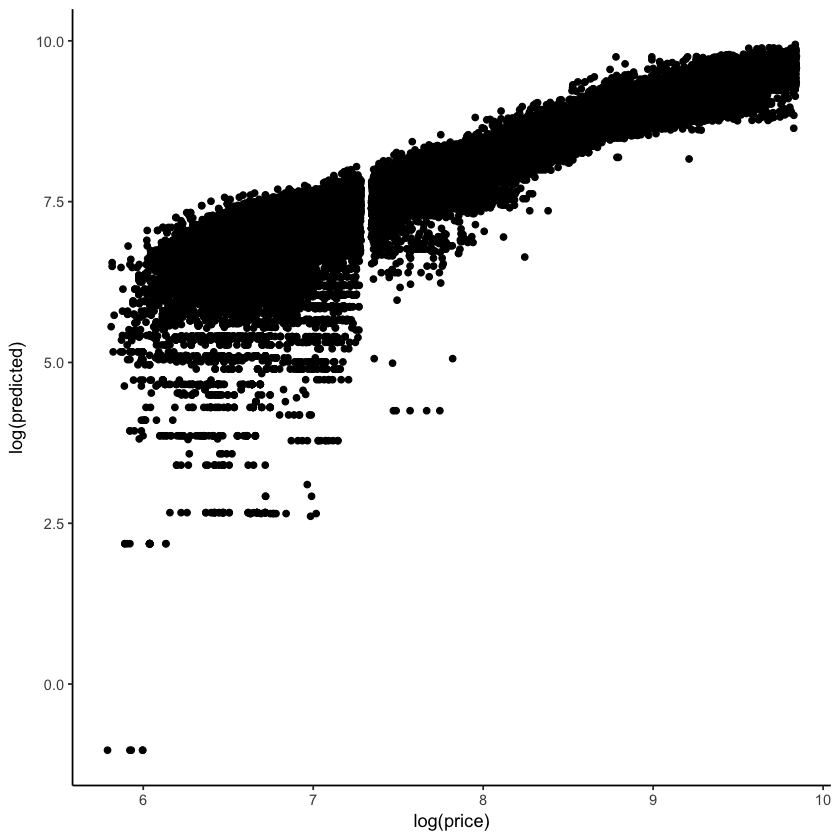

In [41]:
ggplot( df ) +
    geom_point( aes( x = price, y = predicted ) ) +
    theme_classic()

`geom_smooth()` using method = 'gam'


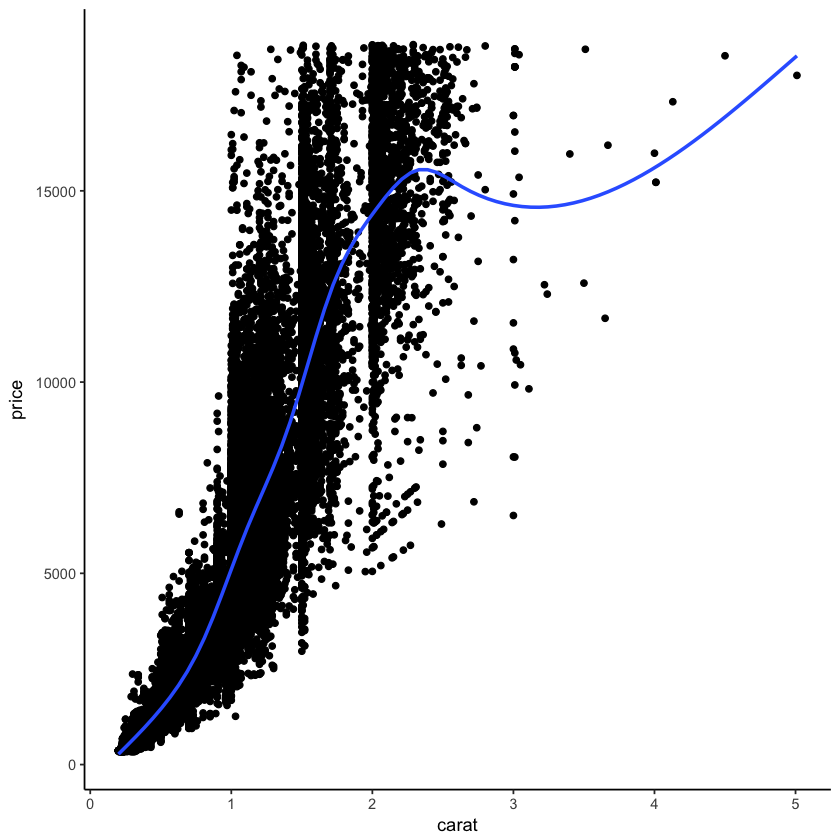

In [46]:
ggplot( df, aes( x = carat, y = price ) ) +
    geom_point() +
    geom_smooth( se = FALSE ) +
    theme_classic()